Trabalho 2
---
## Análise de Dados

### Contexto

O Conjunto de Dados de Admissões de Pós-Graduação de Berkeley em 1973 representa um
marco histórico na análise de admissões em instituições de ensino superior. Ele surgiu no
contexto de debates sobre desigualdade de gênero nos processos de seleção para programas
de pós-graduação nos Estados Unidos durante os anos 1970, uma época em que movimentos
pelos direitos civis e igualdade de gênero estavam em ascensão.
Na década de 1970, havia um crescente questionamento sobre práticas discriminatórias em
ambientes acadêmicos e profissionais. A Universidade da Califórnia, Berkeley, uma das principais
instituições de ensino superior dos EUA, publicou dados relacionados ao processo de admissão
em seus programas de pós-graduação para investigar alegações de desigualdade de gênero.

### Problematização

O Conjunto de Dados de Admissões de Pós-Graduação de Berkeley em 1973 levanta questões
centrais sobre a equidade nos processos seletivos em instituições de ensino superior. Os dados,
à primeira vista, indicam uma desigualdade de gênero nas admissões, sugerindo que mulheres
tinham menor probabilidade de serem aceitas em comparação aos homens. Essa evidência
inicial gerou um debate sobre a possibilidade de discriminação institucional contra mulheres no
ambiente acadêmico.
Atividade
Desenvolver uma análise exploratória de dados que identifique padrões e propondo
interpretações sobre viés e desigualdade na admissão de pós-graduação da Universidade de
Berkeley em 1973.


Segue abaixo o escopo o trabalho:

Análise de dados (7 pontos)
---

### 1. Carregar o dataset e verificar suas informações gerais;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#1.1 Carregar o arquivo csv
berkeley_preprocessado = pd.read_csv("../data/processed/berkeley_preprocessado.csv")

berkeley_preprocessado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          4839 non-null   int64  
 1   DEPARTAMENTO  4839 non-null   object 
 2   GENERO        4839 non-null   object 
 3   ADMISSAO      4839 non-null   object 
 4   CONCORRENCIA  4839 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 189.2+ KB


In [2]:
berkeley_preprocessado.head()

,YEAR,DEPARTAMENTO,GENERO,ADMISSAO,CONCORRENCIA
0,1973,C,F,Rejected,2.86
1,1973,B,M,Accepted,1.58
2,1973,F,F,Accepted,15.19
3,1973,A,M,Accepted,1.36
4,1973,B,M,Accepted,1.58


### 2. Examinar as estatísticas descritivas das variáveis numéricas, verificando médias, medianas, desvios padrão, mínimos e máximos.

In [3]:
estatisticas_descritivas = berkeley_preprocessado['CONCORRENCIA'].describe()
print(estatisticas_descritivas)

count    4839.000000
mean        4.285381
std         4.618648
min         1.360000
25%         1.360000
50%         2.860000
75%         3.970000
max        15.190000
Name: CONCORRENCIA, dtype: float64


### 3. Analisar a distribuição de frequências das variáveis categóricas.

In [4]:
frequencia_genero = pd.DataFrame(
    berkeley_preprocessado['GENERO'].value_counts()
)

total_genero = frequencia_genero.sum()
diferenca_real = frequencia_genero['count'][0] - frequencia_genero['count'][1]

print((diferenca_real / total_genero * 100).round(2))

frequencia_genero['DISTRIBUICAO'] = (
    frequencia_genero / total_genero * 100
).round(2)

frequencia_genero.reset_index()

count    24.16
dtype: float64


/tmp/ipykernel_2855/352745949.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diferenca_real = frequencia_genero['count'][0] - frequencia_genero['count'][1]


,GENERO,count,DISTRIBUICAO
0,M,3004,62.08
1,F,1835,37.92


Text(0, 0.5, 'Distribuição (%)')

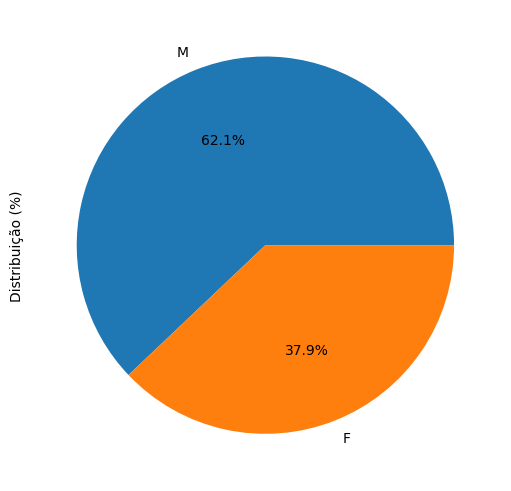

In [5]:
fig, ax = plt.subplots(layout='constrained')

frequencia_genero['DISTRIBUICAO'].plot(kind='pie', rot=True, ax=ax, autopct='%1.1f%%')
ax.set_ylabel("Distribuição (%)")

### 4. Verificar a representatividade de homens e mulheres nas aplicações e admissões por departamento.

In [6]:
df_aceitacao = pd.DataFrame(
    berkeley_preprocessado.groupby(['DEPARTAMENTO', 'GENERO', 'ADMISSAO'])
    .size()
    .unstack(fill_value=0)
)

# Calcular a aceitação
df_aceitacao['ACEITACAO'] = (
    df_aceitacao['Accepted'] / (df_aceitacao['Accepted'] + df_aceitacao['Rejected']) * 100
).round(2)

df_aceitacao.columns = df_aceitacao.columns.str.upper()

df_aceitacao


ADMISSAO             ACCEPTED  REJECTED  ACEITACAO
DEPARTAMENTO GENERO                               
A            F             89        19      82.41
             M            825       313      72.50
B            F             17         8      68.00
             M            353       207      63.04
C            F            201       392      33.90
             M            120       205      36.92
D            F            131       244      34.93
             M            138       279      33.09
E            F             94       299      23.92
             M             53       138      27.75
F            F             25       316       7.33
             M             22       351       5.90

In [7]:
df_aceitacao = df_aceitacao.unstack()
df_aceitacao

ADMISSAO     ACCEPTED      REJECTED      ACEITACAO       
GENERO              F    M        F    M         F      M
DEPARTAMENTO                                             
A                  89  825       19  313     82.41  72.50
B                  17  353        8  207     68.00  63.04
C                 201  120      392  205     33.90  36.92
D                 131  138      244  279     34.93  33.09
E                  94   53      299  138     23.92  27.75
F                  25   22      316  351      7.33   5.90

Text(0, 0.5, 'Aceitação (%)')

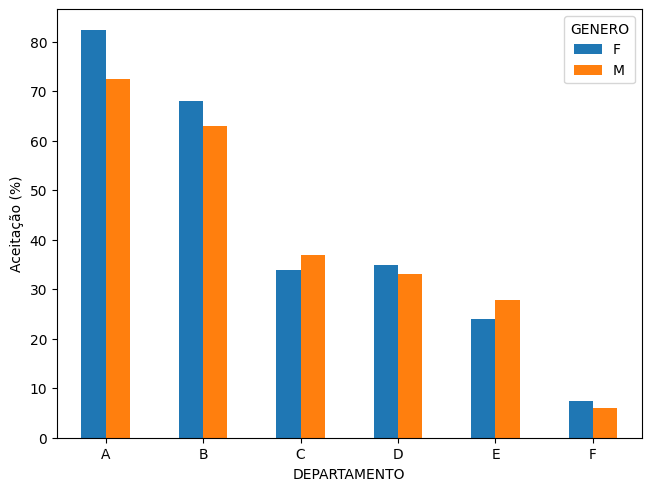

In [8]:
fig, ax = plt.subplots(layout='constrained')

df_aceitacao['ACEITACAO'].plot(kind='bar', rot=True, ax=ax)
ax.set_ylabel("Aceitação (%)")

### 5. Comparar o número total de candidatos (admitidos e rejeitados) por gênero.

In [9]:
df_total_adm_rej_por_genero = (
    berkeley_preprocessado.groupby(['GENERO', 'ADMISSAO'])
    .size()
    .unstack()
)

df_total_adm_rej_por_genero['PROPORCAO'] = (
    df_total_adm_rej_por_genero['Accepted'] / (df_total_adm_rej_por_genero['Accepted'] + df_total_adm_rej_por_genero['Rejected']) * 100
).round(2)

df_total_adm_rej_por_genero.columns = df_total_adm_rej_por_genero.columns.str.upper()

df_total_adm_rej_por_genero

ADMISSAO,ACCEPTED,REJECTED,PROPORCAO
GENERO,,,
F,557,1278,30.35
M,1511,1493,50.30


Text(0, 0.5, 'Total Candidatos x Genero (%)')

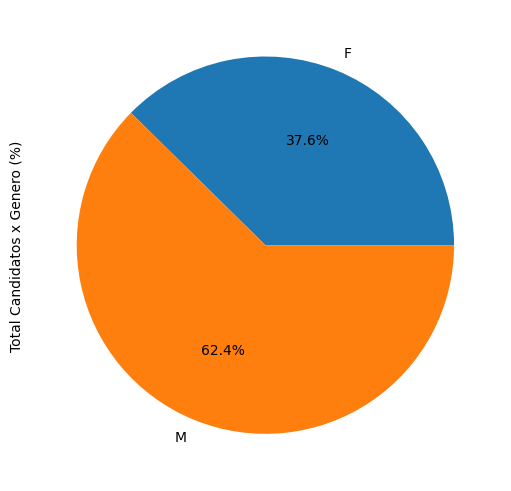

In [10]:
fig, ax = plt.subplots(layout='constrained')

df_total_adm_rej_por_genero['PROPORCAO'].plot(kind='pie', rot=True, ax=ax, autopct='%1.1f%%')
ax.set_ylabel("Total Candidatos x Genero (%)")

### 6. Comparar as taxas de admissão por departamento e gênero.

In [11]:
df_admissao_depart_genero = (
    berkeley_preprocessado.groupby(['ADMISSAO', 'DEPARTAMENTO', 'GENERO'])
    .size()
    .unstack(fill_value=0)
)

df_admissao_depart_genero['PROPORCAO_F'] = (
    df_admissao_depart_genero['F'] / (df_admissao_depart_genero['F'] + df_admissao_depart_genero['M']) * 100
).round(2)

df_admissao_depart_genero['PROPORCAO_M'] = (
    df_admissao_depart_genero['M'] / (df_admissao_depart_genero['M'] + df_admissao_depart_genero['F']) * 100
).round(2)

df_admissao_depart_genero = df_admissao_depart_genero.unstack(level=0)
df_admissao_depart_genero

GENERO              F                 M          PROPORCAO_F           \
ADMISSAO     Accepted Rejected Accepted Rejected    Accepted Rejected   
DEPARTAMENTO                                                            
A                  89       19      825      313        9.74     5.72   
B                  17        8      353      207        4.59     3.72   
C                 201      392      120      205       62.62    65.66   
D                 131      244      138      279       48.70    46.65   
E                  94      299       53      138       63.95    68.42   
F                  25      316       22      351       53.19    47.38   

GENERO       PROPORCAO_M           
ADMISSAO        Accepted Rejected  
DEPARTAMENTO                       
A                  90.26    94.28  
B                  95.41    96.28  
C                  37.38    34.34  
D                  51.30    53.35  
E                  36.05    31.58  
F                  46.81    52.62

Text(0, 0.5, 'Masculino: Adminissão x Departamento e Genero (%)')

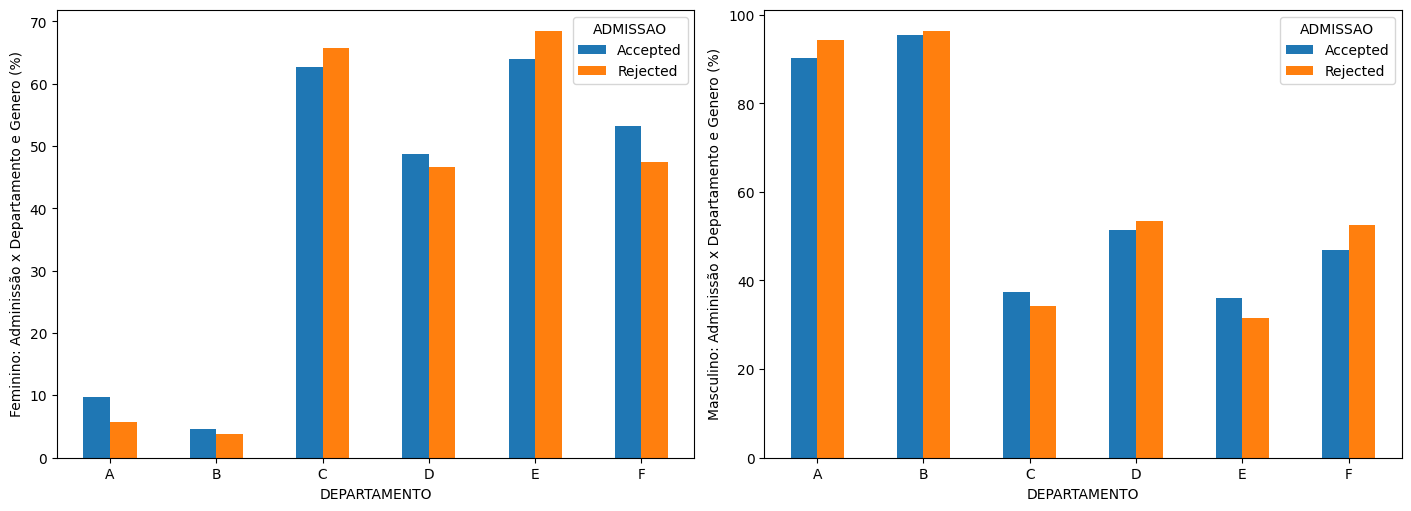

In [12]:
fig, (ax, ax1) = plt.subplots(ncols=2, layout='constrained', figsize=(14,5))

df_admissao_depart_genero['PROPORCAO_F'].plot(kind='bar', rot=True, ax=ax)
ax.set_ylabel("Feminino: Adminissão x Departamento e Genero (%)")

df_admissao_depart_genero['PROPORCAO_M'].plot(kind='bar', rot=True, ax=ax1)
ax1.set_ylabel("Masculino: Adminissão x Departamento e Genero (%)")

In [13]:
relacao_admissao_departamento_genero = df_admissao_depart_genero[['PROPORCAO_F', 'PROPORCAO_M']].corr()
relacao_admissao_departamento_genero


GENERO               PROPORCAO_F           PROPORCAO_M          
ADMISSAO                Accepted  Rejected    Accepted  Rejected
GENERO      ADMISSAO                                            
PROPORCAO_F Accepted    1.000000  0.992128   -1.000000 -0.992128
            Rejected    0.992128  1.000000   -0.992128 -1.000000
PROPORCAO_M Accepted   -1.000000 -0.992128    1.000000  0.992128
            Rejected   -0.992128 -1.000000    0.992128  1.000000

<Axes: xlabel='GENERO-ADMISSAO', ylabel='GENERO-ADMISSAO'>

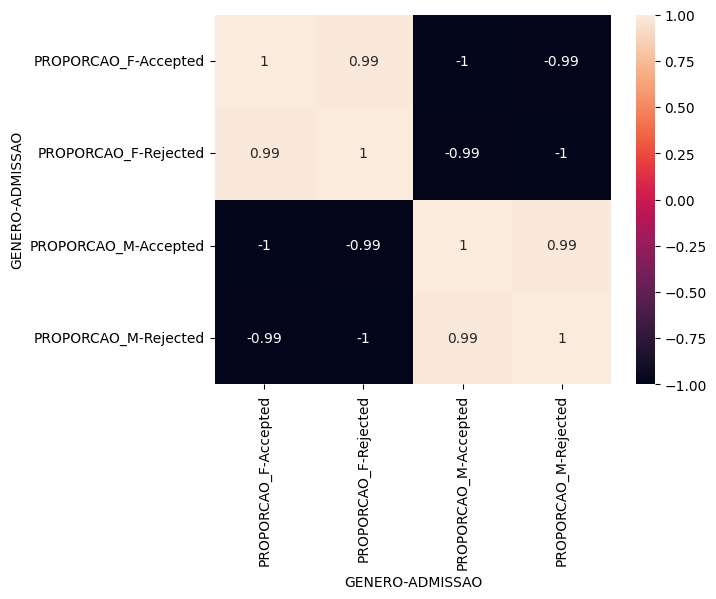

In [14]:
import seaborn as sns

sns.heatmap(
    relacao_admissao_departamento_genero,
    annot=True
)

In [15]:
# Calcular a taxa de admissão para cada combinação de valores agrupados (gênero e admissão)
# size() conta número de ocorrência em cada grupo
# unstack() Reorganiza os valores de ADMISSAO (Accepted, Rejected) em colunas separadas.

df_admissao_depart_genero_insc = (
    berkeley_preprocessado.groupby(['DEPARTAMENTO', 'GENERO', 'ADMISSAO'])
    .size()
    .unstack(fill_value=0)
)
# calcula a propoção de mulheres
df_admissao_depart_genero_insc['PROPORCAO_Accepeted'] = (
    df_admissao_depart_genero_insc['Accepted'] /
    (df_admissao_depart_genero_insc['Accepted'] + df_admissao_depart_genero_insc['Rejected']) * 100
).round(2)

df_admissao_depart_genero_insc['PROPORCAO_Rejected'] = (
    df_admissao_depart_genero_insc['Rejected'] /
    (df_admissao_depart_genero_insc['Accepted'] + df_admissao_depart_genero_insc['Rejected']) * 100
).round(2)

df_admissao_depart_genero_insc = df_admissao_depart_genero_insc.unstack(level=1)
df_admissao_depart_genero_insc

ADMISSAO     Accepted      Rejected      PROPORCAO_Accepeted         \
GENERO              F    M        F    M                   F      M   
DEPARTAMENTO                                                          
A                  89  825       19  313               82.41  72.50   
B                  17  353        8  207               68.00  63.04   
C                 201  120      392  205               33.90  36.92   
D                 131  138      244  279               34.93  33.09   
E                  94   53      299  138               23.92  27.75   
F                  25   22      316  351                7.33   5.90   

ADMISSAO     PROPORCAO_Rejected         
GENERO                        F      M  
DEPARTAMENTO                            
A                         17.59  27.50  
B                         32.00  36.96  
C                         66.10  63.08  
D                         65.07  66.91  
E                         76.08  72.25  
F                         92.67  94.10

Text(0, 0.5, 'Masculino: Adminissão x Departamento e Genero (%)')

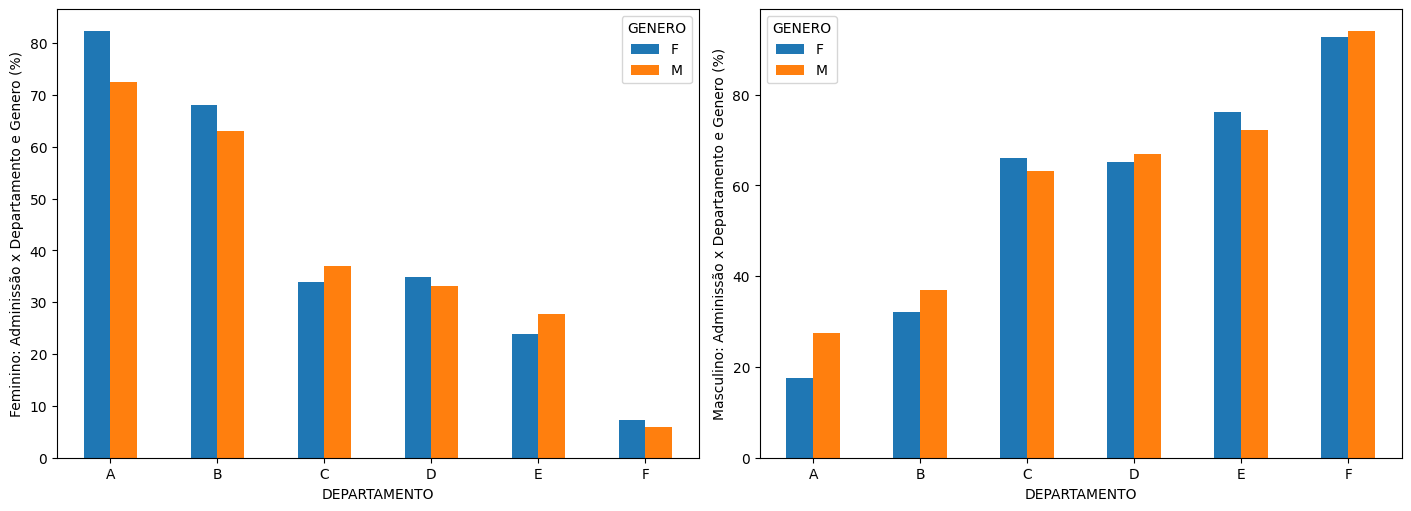

In [16]:
fig, (ax, ax1) = plt.subplots(ncols=2, layout='constrained', figsize=(14,5))

df_admissao_depart_genero_insc['PROPORCAO_Accepeted'].plot(kind='bar', rot=True, ax=ax)
ax.set_ylabel("Feminino: Adminissão x Departamento e Genero (%)")

df_admissao_depart_genero_insc['PROPORCAO_Rejected'].plot(kind='bar', rot=True, ax=ax1)
ax1.set_ylabel("Masculino: Adminissão x Departamento e Genero (%)")

In [17]:
relacao_admissao_departamento_genero_insc = df_admissao_depart_genero_insc[['PROPORCAO_Accepeted', 'PROPORCAO_Rejected']].corr()
relacao_admissao_departamento_genero_insc

ADMISSAO                   PROPORCAO_Accepeted           PROPORCAO_Rejected  \
GENERO                                       F         M                  F   
ADMISSAO            GENERO                                                    
PROPORCAO_Accepeted F                 1.000000  0.991426          -1.000000   
                    M                 0.991426  1.000000          -0.991426   
PROPORCAO_Rejected  F                -1.000000 -0.991426           1.000000   
                    M                -0.991426 -1.000000           0.991426   

ADMISSAO                              
GENERO                             M  
ADMISSAO            GENERO            
PROPORCAO_Accepeted F      -0.991426  
                    M      -1.000000  
PROPORCAO_Rejected  F       0.991426  
                    M       1.000000

<Axes: xlabel='ADMISSAO-GENERO', ylabel='ADMISSAO-GENERO'>

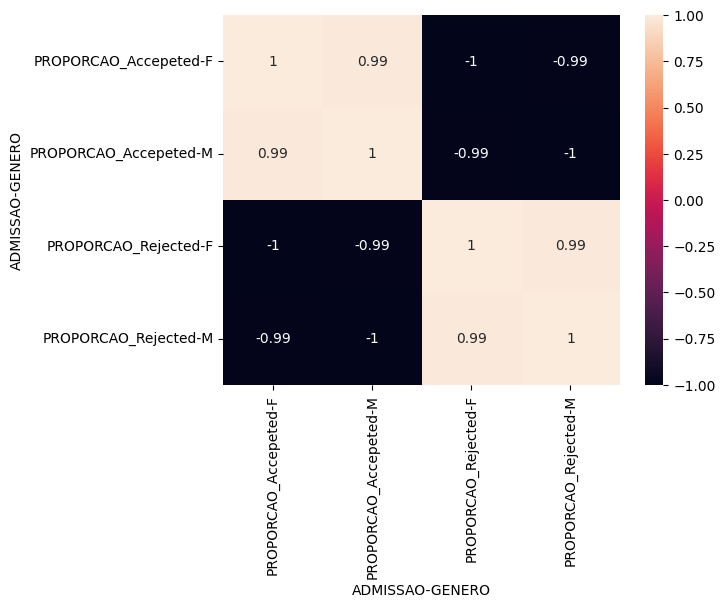

In [18]:
import seaborn as sns

sns.heatmap(
    relacao_admissao_departamento_genero_insc,
    annot=True
)

### 7. Comparar as taxas de admissão agregadas e desagregadas por departamento.

#### ADMISSAO AGREGADA

In [19]:
df_admissao_departamento = (
    berkeley_preprocessado.groupby(['DEPARTAMENTO', 'ADMISSAO'])
    .size()
    .unstack(fill_value=0)
)

df_admissao_departamento

ADMISSAO,Accepted,Rejected
DEPARTAMENTO,,
A,914,332
B,370,215
C,321,597
D,269,523
E,147,437
F,47,667


In [20]:
df_admissao_departamento['TAXA_ADM_AGREGADA'] = (
    df_admissao_departamento['Accepted'] / (df_admissao_departamento['Accepted'] + df_admissao_departamento['Rejected']) * 100
).round(2)

df_admissao_departamento


ADMISSAO,Accepted,Rejected,TAXA_ADM_AGREGADA
DEPARTAMENTO,,,
A,914,332,73.35
B,370,215,63.25
C,321,597,34.97
D,269,523,33.96
E,147,437,25.17
F,47,667,6.58


#### ADMISSAO DESAGREGADA

In [21]:
df_admissao_genero = (
    berkeley_preprocessado.groupby(['DEPARTAMENTO', 'GENERO', 'ADMISSAO'])
    .size()
    .unstack(fill_value=0))

df_admissao_genero


ADMISSAO             Accepted  Rejected
DEPARTAMENTO GENERO                    
A            F             89        19
             M            825       313
B            F             17         8
             M            353       207
C            F            201       392
             M            120       205
D            F            131       244
             M            138       279
E            F             94       299
             M             53       138
F            F             25       316
             M             22       351

In [22]:
df_admissao_genero['TAXA_ADM_DESAGREGADA'] = (
    df_admissao_genero['Accepted'] / (df_admissao_genero['Accepted'] + df_admissao_genero['Rejected']) * 100
).round(2)

df_admissao_genero

ADMISSAO             Accepted  Rejected  TAXA_ADM_DESAGREGADA
DEPARTAMENTO GENERO                                          
A            F             89        19                 82.41
             M            825       313                 72.50
B            F             17         8                 68.00
             M            353       207                 63.04
C            F            201       392                 33.90
             M            120       205                 36.92
D            F            131       244                 34.93
             M            138       279                 33.09
E            F             94       299                 23.92
             M             53       138                 27.75
F            F             25       316                  7.33
             M             22       351                  5.90

In [23]:
tx_comparacao = df_admissao_departamento[['TAXA_ADM_AGREGADA']].join(
    df_admissao_genero[['TAXA_ADM_DESAGREGADA']], how='left'
)

tx_comparacao = tx_comparacao.unstack(level=0)

tx_comparacao

ADMISSAO     TAXA_ADM_AGREGADA                                    \
DEPARTAMENTO                 A      B      C      D      E     F   
GENERO                                                             
F                        73.35  63.25  34.97  33.96  25.17  6.58   
M                        73.35  63.25  34.97  33.96  25.17  6.58   

ADMISSAO     TAXA_ADM_DESAGREGADA                                    
DEPARTAMENTO                    A      B      C      D      E     F  
GENERO                                                               
F                           82.41  68.00  33.90  34.93  23.92  7.33  
M                           72.50  63.04  36.92  33.09  27.75  5.90

Text(0, 0.5, 'Taxa Desagregada(%)')

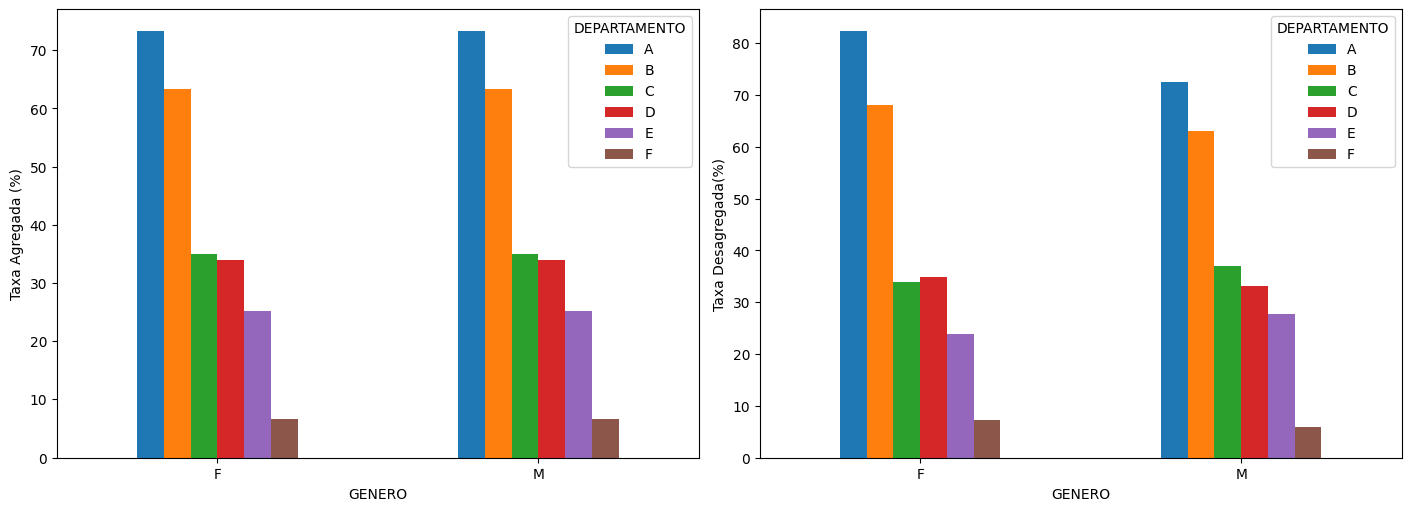

In [24]:
fig, (ax, ax1) = plt.subplots(ncols=2, layout='constrained', figsize=(14,5))

tx_comparacao['TAXA_ADM_AGREGADA'].plot(kind='bar', rot=True, ax=ax)
ax.set_ylabel("Taxa Agregada (%)")

tx_comparacao['TAXA_ADM_DESAGREGADA'].plot(kind='bar', rot=True, ax=ax1)
ax1.set_ylabel("Taxa Desagregada(%)")

### 8. Verificar a relação entre o número de candidatos e as taxas de admissão/rejeição por gênero e departamento.

In [25]:
df_tx_admissao = (
    berkeley_preprocessado.groupby(['DEPARTAMENTO', 'GENERO', 'ADMISSAO'])
    .size()
    .unstack(fill_value=0))


df_tx_admissao['TAXA_ADMISSAO'] = (
    df_tx_admissao['Accepted'] / (df_tx_admissao['Accepted'] + df_tx_admissao['Rejected']) * 100
).round(2)

df_tx_admissao['TAXA_REJEICAO'] = (100 - df_tx_admissao['TAXA_ADMISSAO']).round(2)


df_tx_admissao['TOTAL_CANDIDATOS'] = df_tx_admissao['Accepted'] + df_tx_admissao['Rejected']

df_tx_admissao

ADMISSAO             Accepted  Rejected  TAXA_ADMISSAO  TAXA_REJEICAO  \
DEPARTAMENTO GENERO                                                     
A            F             89        19          82.41          17.59   
             M            825       313          72.50          27.50   
B            F             17         8          68.00          32.00   
             M            353       207          63.04          36.96   
C            F            201       392          33.90          66.10   
             M            120       205          36.92          63.08   
D            F            131       244          34.93          65.07   
             M            138       279          33.09          66.91   
E            F             94       299          23.92          76.08   
             M             53       138          27.75          72.25   
F            F             25       316           7.33          92.67   
             M             22       351           5.90          94.10   

ADMISSAO             TOTAL_CANDIDATOS  
DEPARTAMENTO GENERO                    
A            F                    108  
             M                   1138  
B            F                     25  
             M                    560  
C            F                    593  
             M                    325  
D            F                    375  
             M                    417  
E            F                    393  
             M                    191  
F            F                    341  
             M                    373

In [26]:
relacao = df_tx_admissao[['TOTAL_CANDIDATOS', 'TAXA_ADMISSAO', 'TAXA_REJEICAO' ]].corr()

relacao

ADMISSAO,TOTAL_CANDIDATOS,TAXA_ADMISSAO,TAXA_REJEICAO
ADMISSAO,,,
TOTAL_CANDIDATOS,1.000000,0.119162,-0.119162
TAXA_ADMISSAO,0.119162,1.000000,-1.000000
TAXA_REJEICAO,-0.119162,-1.000000,1.000000


### 9. Comparar as taxas de admissão agregadas para homens e mulheres.

In [27]:
df_tx_admissao_agregadas = (
    berkeley_preprocessado.groupby([ 'ADMISSAO', 'GENERO' ])
    .size()
    .unstack(fill_value=0))

df_tx_admissao_agregadas


GENERO,F,M
ADMISSAO,,
Accepted,557,1511
Rejected,1278,1493


In [28]:
df_tx_admissao_agregadas = df_tx_admissao_agregadas.unstack(level=0)
df_tx_admissao_agregadas

GENERO  ADMISSAO
F       Accepted     557
        Rejected    1278
M       Accepted    1511
        Rejected    1493
dtype: int64

Text(0, 0.5, 'Taxa Agregada (%)')

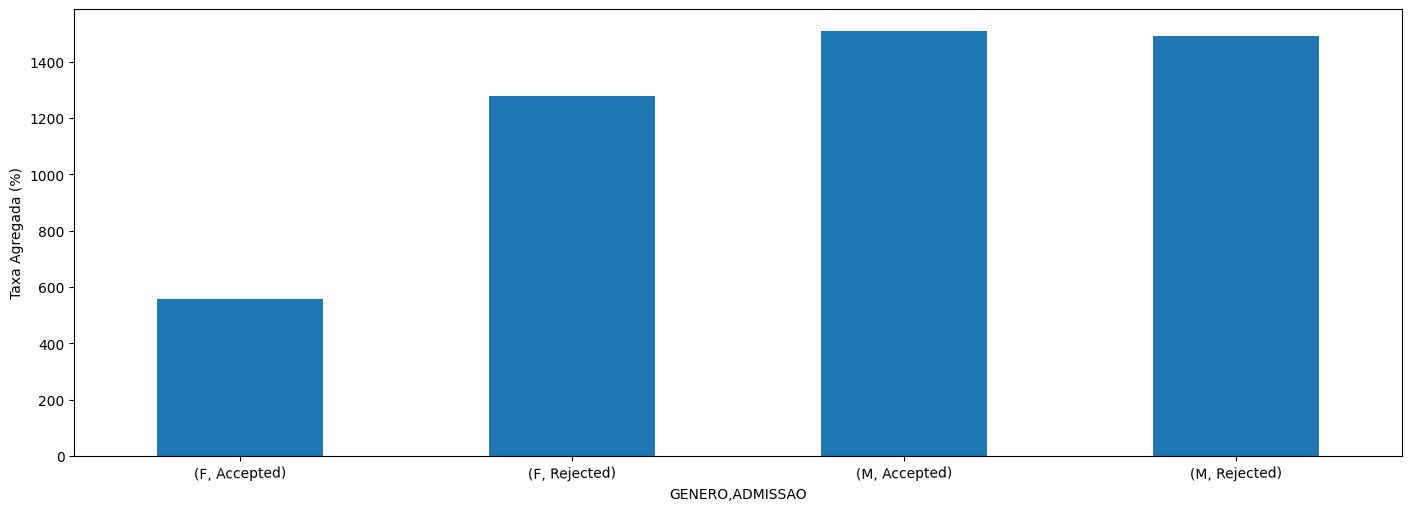

In [29]:
fig, ax = plt.subplots(layout='constrained', figsize=(14,5))

df_tx_admissao_agregadas.plot(kind='bar', rot=True, ax=ax)
ax.set_ylabel("Taxa Agregada (%)")

### 10. Analisar como as taxas de admissão de homens e mulheres variam entre os departamentos.

In [30]:
condicao = berkeley_preprocessado['ADMISSAO'] == 'Accepted'

df_tx_admissao_genero =  (
    berkeley_preprocessado.loc[condicao,].groupby(['DEPARTAMENTO', 'GENERO'])
    .size()
    .unstack(fill_value=0)
    )

df_tx_admissao_genero['VARIACAO'] = (
    (df_tx_admissao_genero['F'] - df_tx_admissao_genero['M']) / (df_tx_admissao_genero['F'] + df_tx_admissao_genero['M']) * 100
)

df_tx_admissao_genero

GENERO,F,M,VARIACAO
DEPARTAMENTO,,,
A,89,825,-80.525164
B,17,353,-90.810811
C,201,120,25.233645
D,131,138,-2.602230
E,94,53,27.891156
F,25,22,6.382979


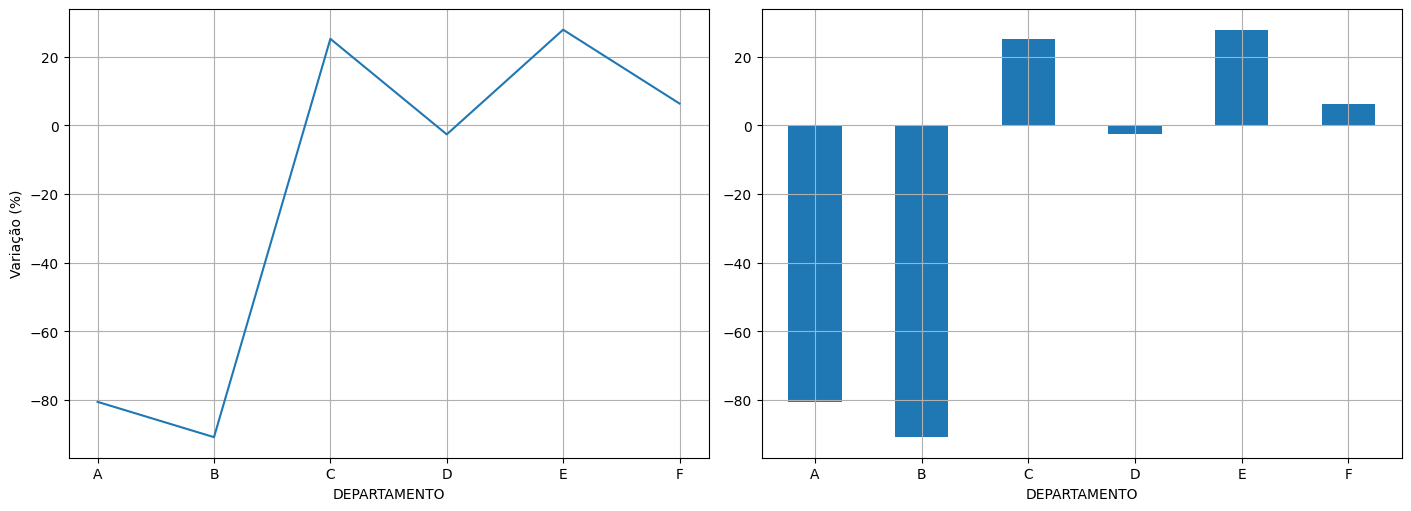

In [31]:
fig, (ax, ax1) = plt.subplots(ncols=2, layout='constrained', figsize=(14,5))

df_tx_admissao_genero['VARIACAO'].plot(kind='line', rot=True, ax=ax)
df_tx_admissao_genero['VARIACAO'].plot(kind='bar', rot=True, ax=ax1)
ax.set_ylabel("Variação (%)")
ax.grid()
ax1.grid()

### 11. Identificar quais departamentos têm as maiores e menores taxas de rejeição.

In [32]:
condicao = berkeley_preprocessado['ADMISSAO'] == 'Rejected'

df_tx_rejeicao = (
    berkeley_preprocessado.loc[condicao,].groupby(['DEPARTAMENTO', 'GENERO'])
    .size()
    .unstack(fill_value=0)
    )

df_tx_rejeicao['VARIACAO'] = (
    (df_tx_rejeicao['F'] - df_tx_rejeicao['M']) / (df_tx_rejeicao['F'] + df_tx_rejeicao['M']) * 100
)

df_tx_rejeicao

GENERO,F,M,VARIACAO
DEPARTAMENTO,,,
A,19,313,-88.554217
B,8,207,-92.558140
C,392,205,31.323283
D,244,279,-6.692161
E,299,138,36.842105
F,316,351,-5.247376


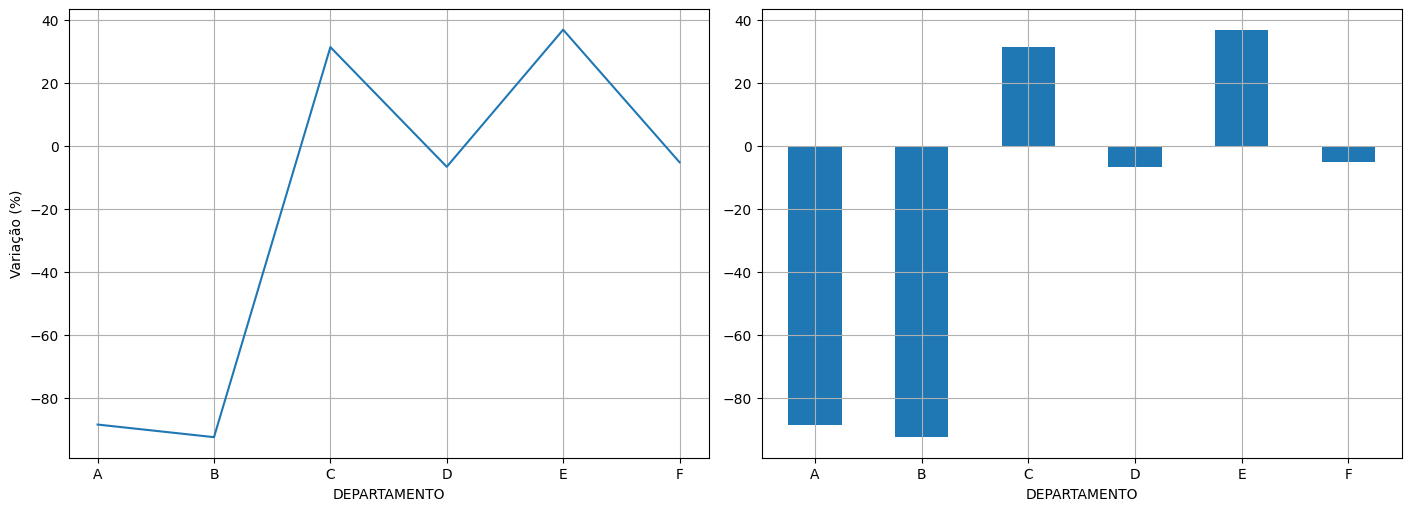

In [33]:
fig, (ax, ax1) = plt.subplots(ncols=2, layout='constrained', figsize=(14,5))

df_tx_rejeicao['VARIACAO'].plot(kind='line', rot=True, ax=ax)
df_tx_rejeicao['VARIACAO'].plot(kind='bar', rot=True, ax=ax1)
ax.set_ylabel("Variação (%)")
ax.grid()
ax1.grid()

### 12. Avaliar a proporção de inscrições feitas por homens e mulheres nos departamentos mais e menos competitivos.

In [34]:
df_porporcao_gemero_concorencia = pd.DataFrame(
    berkeley_preprocessado.groupby(['CONCORRENCIA', 'DEPARTAMENTO', 'GENERO' ])
    .size()
).rename(columns={0:'INSCRICOES'})

df_porporcao_gemero_concorencia = df_porporcao_gemero_concorencia.unstack(
    fill_value=0
)

df_porporcao_gemero_concorencia


INSCRICOES      
GENERO                             F     M
CONCORRENCIA DEPARTAMENTO                 
1.36         A                   108  1138
1.58         B                    25   560
2.86         C                   593   325
2.94         D                   375   417
3.97         E                   393   191
15.19        F                   341   373

Text(0, 0.5, 'Taxa (%)')

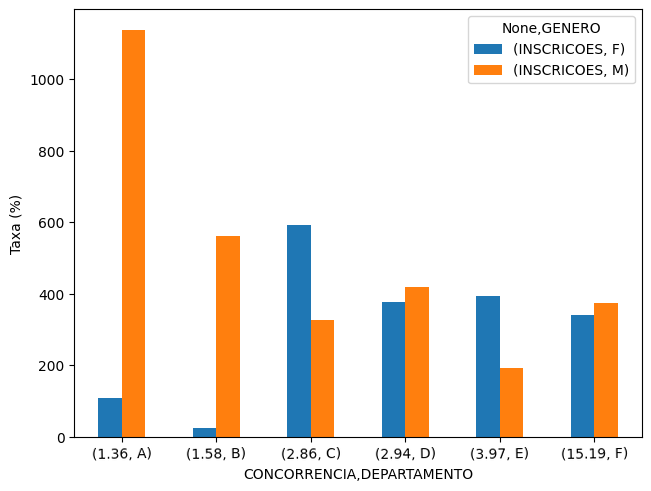

In [35]:
fig, ax = plt.subplots(layout='constrained')

df_porporcao_gemero_concorencia.plot(kind='bar', rot=True, ax=ax)
ax.set_ylabel("Taxa (%)")

### 13. Comparar as taxas de admissão gerais com as taxas de admissão por departamento.

In [36]:
condicao = berkeley_preprocessado['ADMISSAO'] == 'Accepted'

admissao_total = berkeley_preprocessado.loc[condicao,]['ADMISSAO'].count()

df_tx_admissao_geral_por_departamento =  pd.DataFrame(
    berkeley_preprocessado.loc[condicao,].groupby(['DEPARTAMENTO'])
    .size()
    ).rename(columns={0:'ADMISSAO'})


df_tx_admissao_geral_por_departamento['TAXA_GERAL'] = (
    df_tx_admissao_geral_por_departamento['ADMISSAO'] / admissao_total * 100
).round(2)

df_tx_admissao_geral_por_departamento

,ADMISSAO,TAXA_GERAL
DEPARTAMENTO,,
A,914,44.20
B,370,17.89
C,321,15.52
D,269,13.01
E,147,7.11
F,47,2.27


Text(0, 0.5, 'Taxa (%)')

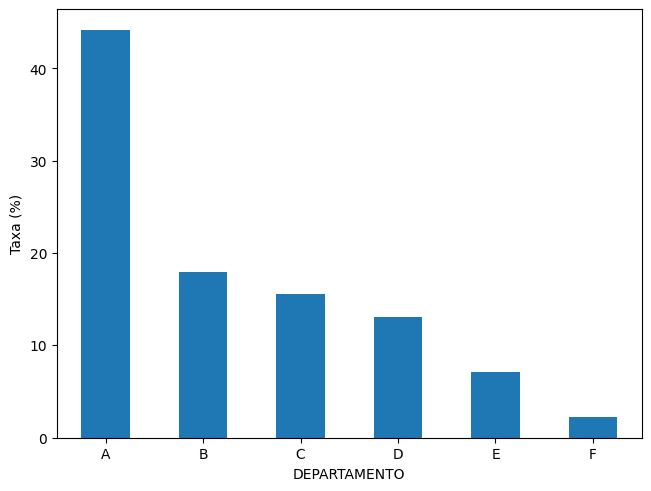

In [37]:
fig, ax = plt.subplots(layout='constrained')

df_tx_admissao_geral_por_departamento['TAXA_GERAL'].plot(kind='bar', rot=True, ax=ax)
ax.set_ylabel("Taxa (%)")

### 14. Verificar se existem preferências de departamentos por gênero que podem influenciar os resultados observados.

Text(0, 0.5, 'Taxa (%)')

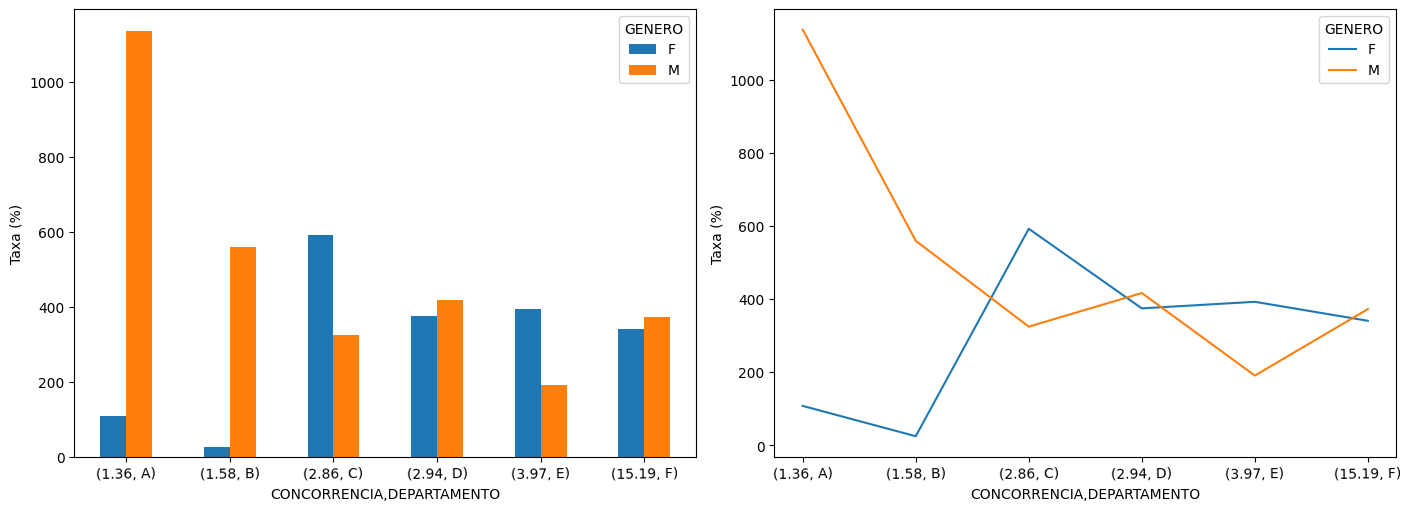

In [38]:
fig, (ax, ax1) = plt.subplots(ncols=2, layout='constrained', figsize=(14,5))

df_porporcao_gemero_concorencia['INSCRICOES'].plot(kind='bar', rot=True, ax=ax)
ax.set_ylabel("Taxa (%)")

df_porporcao_gemero_concorencia['INSCRICOES'].plot(kind='line', rot=True, ax=ax1)
ax1.set_ylabel("Taxa (%)")
